In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing the Packages**

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#**Loading the Dataset**


In [4]:
# Load the dataset
print("Loading the dataset...")
data = pd.read_csv('/content/drive/MyDrive/Customer Churn Analysis/tel_churn.csv')

Loading the dataset...


In [5]:
data

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29,29,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56,1889,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53,108,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42,1840,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70,151,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84,1990,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103,7362,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29,346,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74,306,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [6]:
data = data.drop(columns=['Unnamed: 0'])

In [7]:
data

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84,1990,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103,7362,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29,346,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74,306,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


#**Computing the correlation matrix and selecting features**

In [8]:
print("Computing the correlation matrix and selecting features...")
correlation_matrix = data.corr()

Computing the correlation matrix and selecting features...


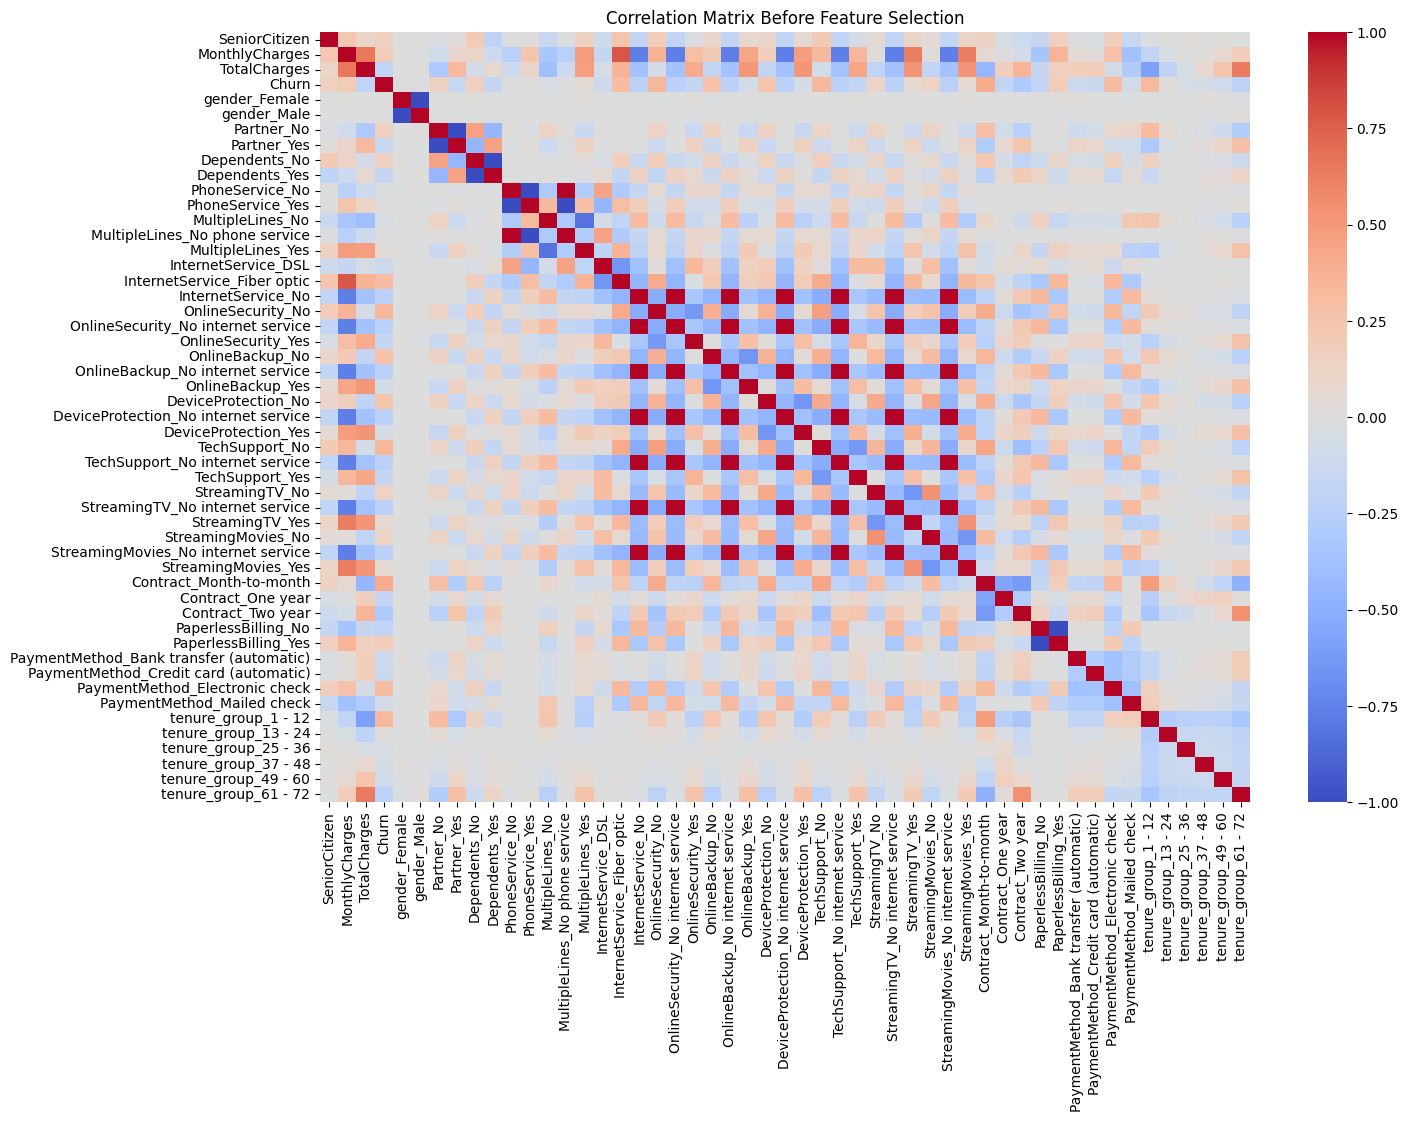

In [14]:
# Compute the initial correlation matrix
initial_correlation_matrix = data.corr()

# Plot the correlation matrix before feature selection
plt.figure(figsize=(15, 10))
sns.heatmap(initial_correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Before Feature Selection')
plt.show()

In [21]:
print("Computing the correlation matrix and selecting features...")
correlation_matrix = data.corr()

# Calculate the absolute value of the correlation matrix and use it to find highly correlated features
abs_correlation_matrix = correlation_matrix.abs()

# Select upper triangle of correlation matrix
upper_triangle = abs_correlation_matrix.where(np.triu(np.ones(abs_correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
corr_threshold = 0.7
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > corr_threshold)]

# Drop highly correlated features
data_reduced = data.drop(columns=to_drop)

print("Features selected after removing highly correlated ones:\n", data_reduced.columns)

Computing the correlation matrix and selecting features...
Features selected after removing highly correlated ones:
 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No',
       'MultipleLines_No', 'InternetService_DSL', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
       'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_6

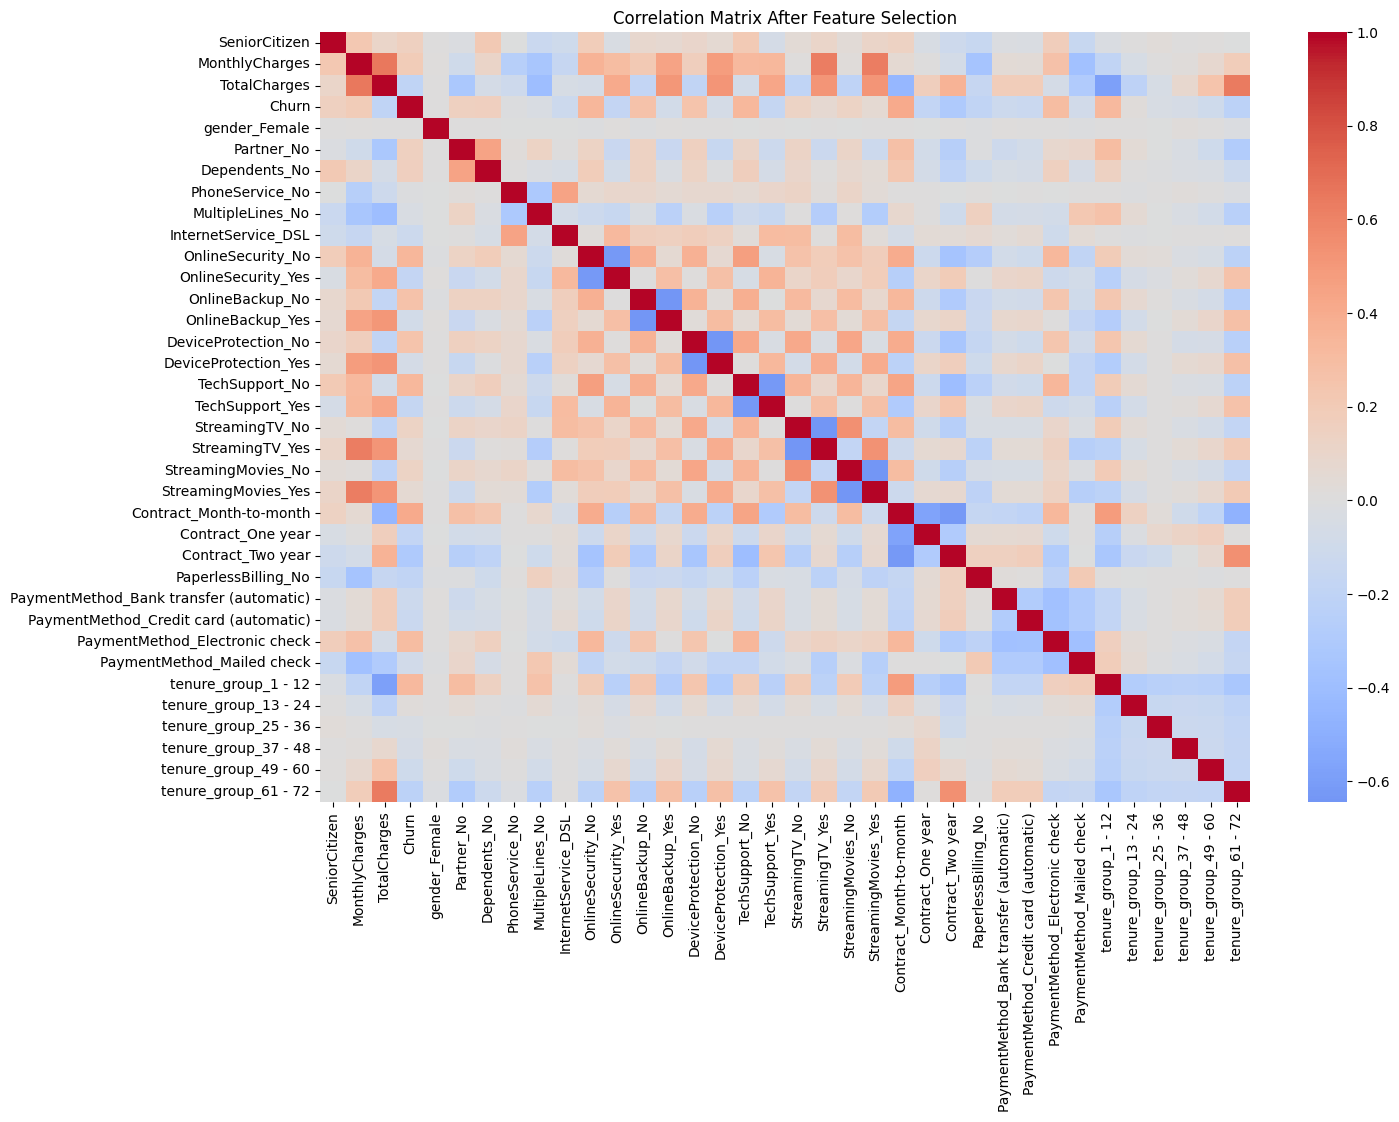

In [22]:
# Compute the correlation matrix after feature selection
reduced_correlation_matrix = data_reduced.corr()

# Plot the correlation matrix after feature selection
plt.figure(figsize=(15, 10))
sns.heatmap(reduced_correlation_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix After Feature Selection')
plt.show()

#**Data Splitting and Feature Scaling**

In [23]:
# Splitting the data into features and target
print("Splitting the data into training and testing sets...")
X = data_reduced.drop(columns=['Churn'])
y = data_reduced['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
print("Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splitting the data into training and testing sets...
Scaling features...


In [26]:
X_train_scaled

array([[-0.4369239 , -0.20361713, -0.76748347, ..., -0.34258813,
        -0.36297993, -0.50653125],
       [-0.4369239 , -0.10401761, -0.3067711 , ..., -0.34258813,
        -0.36297993, -0.50653125],
       [-0.4369239 ,  0.16158109, -0.9085269 , ..., -0.34258813,
        -0.36297993, -0.50653125],
       ...,
       [-0.4369239 ,  0.55997914, -0.65915859, ..., -0.34258813,
        -0.36297993, -0.50653125],
       [-0.4369239 , -1.4984108 , -0.5685194 , ..., -0.34258813,
         2.75497329, -0.50653125],
       [ 2.2887281 ,  0.29438044, -0.3589439 , ..., -0.34258813,
        -0.36297993, -0.50653125]])

In [27]:
X_test_scaled

array([[ 2.2887281 , -1.29921177, -0.34214249, ..., -0.34258813,
        -0.36297993,  1.97421185],
       [-0.4369239 , -1.33241161, -0.80020201, ..., -0.34258813,
        -0.36297993, -0.50653125],
       [-0.4369239 ,  1.25717573, -0.40492671, ..., -0.34258813,
        -0.36297993, -0.50653125],
       ...,
       [-0.4369239 , -1.46521096, -0.58885795, ...,  2.91895692,
        -0.36297993, -0.50653125],
       [-0.4369239 , -0.30321664, -0.89128334, ..., -0.34258813,
        -0.36297993, -0.50653125],
       [ 2.2887281 ,  1.25717573,  1.95125012, ..., -0.34258813,
        -0.36297993,  1.97421185]])

# **Training and Evaluating Models**

##Logistic Regression

In [28]:
print("Training Logistic Regression...")
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_reg.predict(X_test_scaled)

Training Logistic Regression...


##Decision Tree


In [29]:
print("Training Decision Tree...")
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

Training Decision Tree...


##Random Forest

In [30]:
print("Training Random Forest...")
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

Training Random Forest...


##Gradient Boosting Machine (GBM)

In [31]:
print("Training Gradient Boosting Machine...")
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

Training Gradient Boosting Machine...


##XGBoost

In [53]:
# XGBoost
print("Training XGBoost...")
xgboost = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=50)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

Training XGBoost...


##Support Vector Machine (SVM)

In [37]:
print("Training Support Vector Machine...")
svm = SVC(random_state=42, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

Training Support Vector Machine...


#**Storing and Displaying Model Results**

In [54]:
# Storing the results in a dictionary
model_results = {
    'Logistic Regression': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_logistic),
        'f1_score': f1_score(y_test, y_pred_logistic),
        'accuracy': accuracy_score(y_test, y_pred_logistic)
    },
    'Decision Tree': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_tree),
        'f1_score': f1_score(y_test, y_pred_tree),
        'accuracy': accuracy_score(y_test, y_pred_tree)
    },
    'Random Forest': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_forest),
        'f1_score': f1_score(y_test, y_pred_forest),
        'accuracy': accuracy_score(y_test, y_pred_forest)
    },
    'XGBoost': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_xgb),
        'f1_score': f1_score(y_test, y_pred_xgb),
        'accuracy': accuracy_score(y_test, y_pred_xgb)
    },
    'Support Vector Machine': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_svm),
        'f1_score': f1_score(y_test, y_pred_svm),
        'accuracy': accuracy_score(y_test, y_pred_svm)
    },
    'Gradient Boosting Machine': {
        'confusion_matrix': confusion_matrix(y_test, y_pred_gbm),
        'f1_score': f1_score(y_test, y_pred_gbm),
        'accuracy': accuracy_score(y_test, y_pred_gbm)
    }
}

print("Model evaluation results stored.")


Model evaluation results stored.


#**Visualizing Confusion Matrices and Comparing Models**

Plotting confusion matrices...


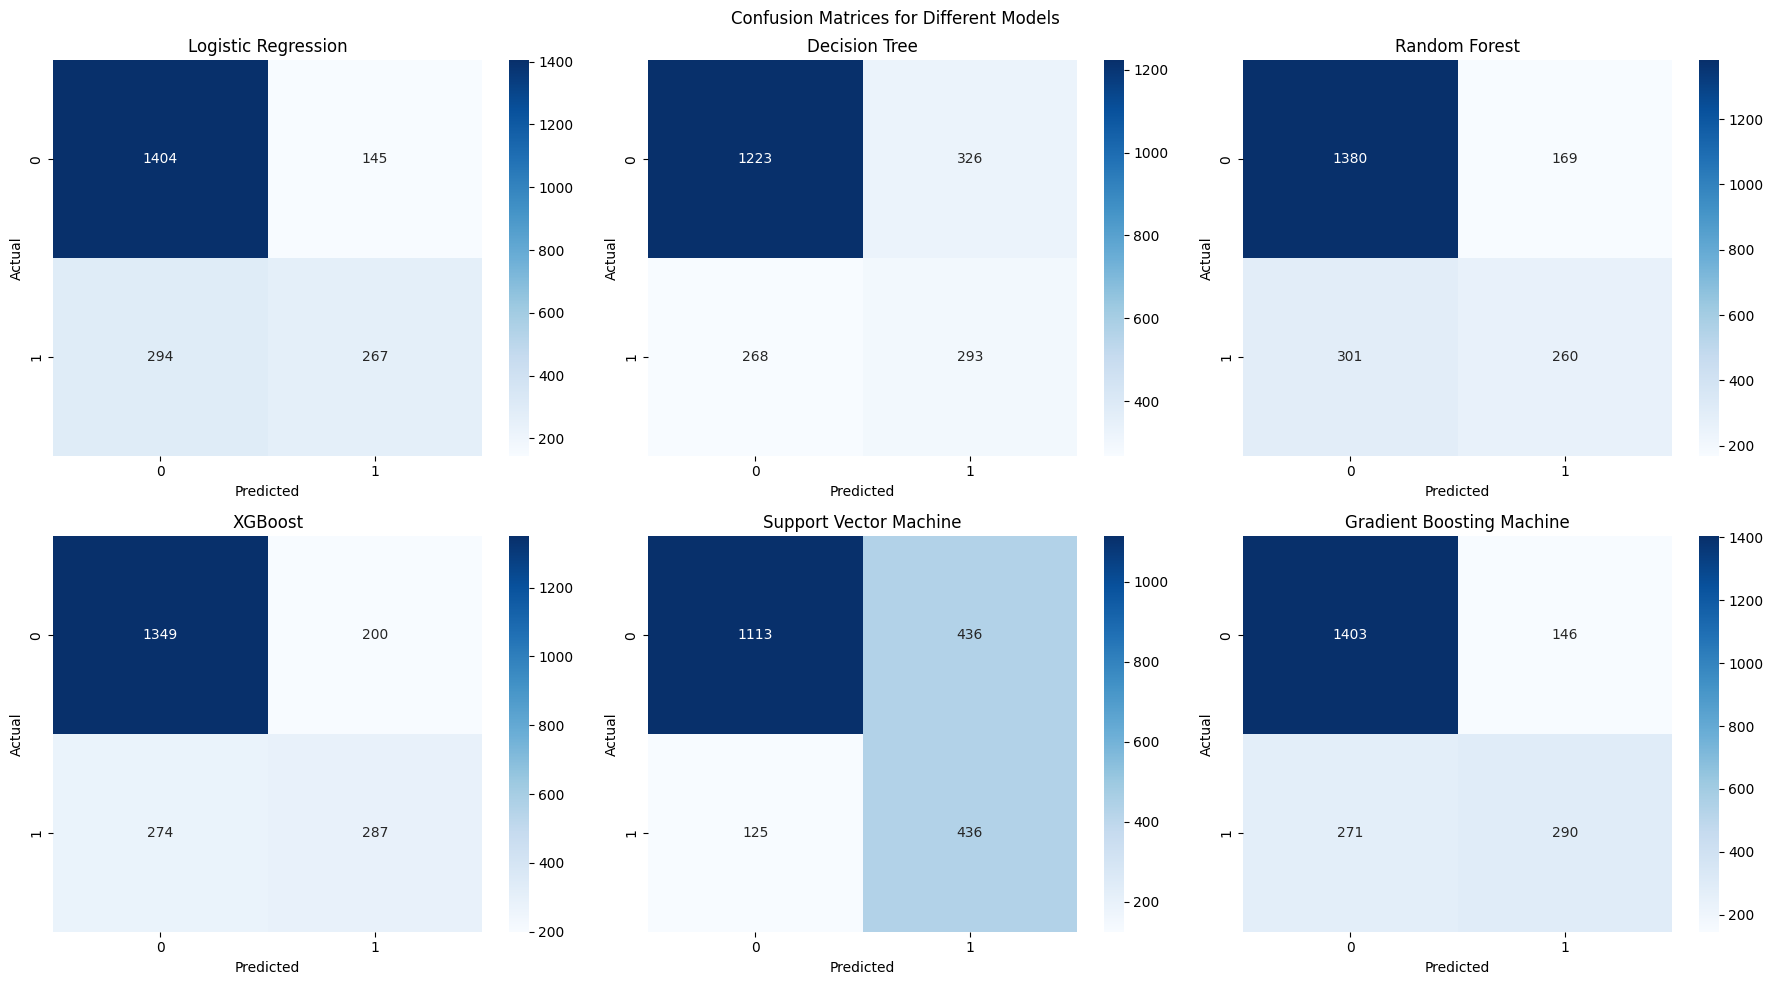

Creating comparison table...
Model Comparison:
                           F1 Score  Accuracy  \
Logistic Regression        0.548818  0.791943   
Decision Tree               0.49661  0.718483   
Random Forest              0.525253  0.777251   
XGBoost                     0.54771  0.775355   
Support Vector Machine     0.608514  0.734123   
Gradient Boosting Machine  0.581745   0.80237   

                                              Confusion Matrix  
Logistic Regression        TP: 267, FP: 145, FN: 294, TN: 1404  
Decision Tree              TP: 293, FP: 326, FN: 268, TN: 1223  
Random Forest              TP: 260, FP: 169, FN: 301, TN: 1380  
XGBoost                    TP: 287, FP: 200, FN: 274, TN: 1349  
Support Vector Machine     TP: 436, FP: 436, FN: 125, TN: 1113  
Gradient Boosting Machine  TP: 290, FP: 146, FN: 271, TN: 1403  


In [55]:
# Plotting the confusion matrices
print("Plotting confusion matrices...")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Different Models')

for ax, (model_name, metrics) in zip(axes.ravel(), model_results.items()):
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Creating a comparison table
print("Creating comparison table...")
comparison_table = pd.DataFrame(model_results).T
comparison_table['Confusion Matrix'] = comparison_table['confusion_matrix'].apply(
    lambda cm: f"TP: {cm[1,1]}, FP: {cm[0,1]}, FN: {cm[1,0]}, TN: {cm[0,0]}"
)
comparison_table = comparison_table.drop(columns=['confusion_matrix'])
comparison_table = comparison_table.rename(columns={'f1_score': 'F1 Score', 'accuracy': 'Accuracy'})

print("Model Comparison:")
print(comparison_table)

#**Hyperparameter Tuning**

In [40]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.7 MB/s eta 0:00:00


##Suport Vector Machine (SVM)

In [49]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to optimize SVM hyperparameters
def svm_objective(trial):
    print("Starting a new trial for SVM hyperparameter tuning...")
    # Define the hyperparameter search space
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    # Create and train the SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Trial complete with C={C}, kernel={kernel}, gamma={gamma}, accuracy={accuracy}")

    return accuracy

# Create a study and optimize the objective function
print("Creating a study for SVM...")
svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(svm_objective, n_trials=150)

[I 2024-07-30 15:02:47,943] A new study created in memory with name: no-name-3984e863-2b9c-42e2-ab68-085e98dfd385


Creating a study for SVM...
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:02:49,174] Trial 0 finished with value: 0.7341232227488151 and parameters: {'C': 1.0948585172545261e-05, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 0 with value: 0.7341232227488151.


Trial complete with C=1.0948585172545261e-05, kernel=poly, gamma=auto, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:02:50,994] Trial 1 finished with value: 0.7341232227488151 and parameters: {'C': 5.468229330456948e-05, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.7341232227488151.


Trial complete with C=5.468229330456948e-05, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:02:58,445] Trial 2 finished with value: 0.7933649289099526 and parameters: {'C': 6.779654393793901, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=6.779654393793901, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:02:59,665] Trial 3 finished with value: 0.7445497630331753 and parameters: {'C': 31.987756688072093, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=31.987756688072093, kernel=sigmoid, gamma=scale, accuracy=0.7445497630331753
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:03,060] Trial 4 finished with value: 0.7933649289099526 and parameters: {'C': 3.275496204586969, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=3.275496204586969, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:04,084] Trial 5 finished with value: 0.7881516587677725 and parameters: {'C': 0.15918048687011335, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=0.15918048687011335, kernel=rbf, gamma=auto, accuracy=0.7881516587677725
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:05,351] Trial 6 finished with value: 0.7815165876777251 and parameters: {'C': 2.296819152093054, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=2.296819152093054, kernel=rbf, gamma=auto, accuracy=0.7815165876777251
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:06,433] Trial 7 finished with value: 0.7341232227488151 and parameters: {'C': 3.732870205224011e-05, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=3.732870205224011e-05, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:07,074] Trial 8 finished with value: 0.7341232227488151 and parameters: {'C': 0.0001064139841637982, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=0.0001064139841637982, kernel=linear, gamma=auto, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:07,716] Trial 9 finished with value: 0.7900473933649289 and parameters: {'C': 0.0009150632487780398, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=0.0009150632487780398, kernel=linear, gamma=auto, accuracy=0.7900473933649289
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:09,131] Trial 10 finished with value: 0.7341232227488151 and parameters: {'C': 0.010883865008140777, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=0.010883865008140777, kernel=sigmoid, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:22,015] Trial 11 finished with value: 0.7924170616113744 and parameters: {'C': 18.358489202587258, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=18.358489202587258, kernel=linear, gamma=scale, accuracy=0.7924170616113744
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:03:23,701] Trial 12 finished with value: 0.7933649289099526 and parameters: {'C': 0.8161330382593626, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=0.8161330382593626, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:27,399] Trial 13 finished with value: 0.7928909952606635 and parameters: {'C': 83.26010226275825, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=83.26010226275825, kernel=linear, gamma=scale, accuracy=0.7928909952606635
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:29,121] Trial 14 finished with value: 0.7644549763033175 and parameters: {'C': 2.948352142454417, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 2 with value: 0.7933649289099526.


Trial complete with C=2.948352142454417, kernel=poly, gamma=scale, accuracy=0.7644549763033175
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:29,842] Trial 15 finished with value: 0.7943127962085308 and parameters: {'C': 0.03913704973217903, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 15 with value: 0.7943127962085308.


Trial complete with C=0.03913704973217903, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:30,450] Trial 16 finished with value: 0.7943127962085308 and parameters: {'C': 0.019250166657403017, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 15 with value: 0.7943127962085308.


Trial complete with C=0.019250166657403017, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:31,045] Trial 17 finished with value: 0.795734597156398 and parameters: {'C': 0.00741089244331774, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00741089244331774, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:32,470] Trial 18 finished with value: 0.7341232227488151 and parameters: {'C': 0.002742280586870385, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.002742280586870385, kernel=sigmoid, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:33,271] Trial 19 finished with value: 0.7881516587677725 and parameters: {'C': 0.2188707126959641, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.2188707126959641, kernel=poly, gamma=scale, accuracy=0.7881516587677725
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:33,921] Trial 20 finished with value: 0.7824644549763033 and parameters: {'C': 0.0006151117868312656, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0006151117868312656, kernel=linear, gamma=scale, accuracy=0.7824644549763033
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:34,585] Trial 21 finished with value: 0.795260663507109 and parameters: {'C': 0.030005688579374707, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.030005688579374707, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:35,326] Trial 22 finished with value: 0.7938388625592417 and parameters: {'C': 0.05729223941203219, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.05729223941203219, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:35,934] Trial 23 finished with value: 0.7938388625592417 and parameters: {'C': 0.005230636886372472, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.005230636886372472, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:36,635] Trial 24 finished with value: 0.7943127962085308 and parameters: {'C': 0.04219648097423866, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.04219648097423866, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:37,651] Trial 25 finished with value: 0.7928909952606635 and parameters: {'C': 0.2008783237313152, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.2008783237313152, kernel=linear, gamma=scale, accuracy=0.7928909952606635
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:38,279] Trial 26 finished with value: 0.7872037914691943 and parameters: {'C': 0.0010834100378607117, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0010834100378607117, kernel=linear, gamma=auto, accuracy=0.7872037914691943
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:39,172] Trial 27 finished with value: 0.7933649289099526 and parameters: {'C': 0.5678327940193998, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.5678327940193998, kernel=poly, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:41,284] Trial 28 finished with value: 0.7341232227488151 and parameters: {'C': 0.005240755949190076, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.005240755949190076, kernel=sigmoid, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:42,687] Trial 29 finished with value: 0.7663507109004739 and parameters: {'C': 0.04854126816800478, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.04854126816800478, kernel=poly, gamma=auto, accuracy=0.7663507109004739
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:43,820] Trial 30 finished with value: 0.7374407582938388 and parameters: {'C': 0.0003536694308438748, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0003536694308438748, kernel=linear, gamma=scale, accuracy=0.7374407582938388
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:44,471] Trial 31 finished with value: 0.7933649289099526 and parameters: {'C': 0.011787381429625038, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.011787381429625038, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:45,080] Trial 32 finished with value: 0.7943127962085308 and parameters: {'C': 0.01598321353604109, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01598321353604109, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:45,673] Trial 33 finished with value: 0.7886255924170616 and parameters: {'C': 0.002569883614173604, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.002569883614173604, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:46,298] Trial 34 finished with value: 0.7943127962085308 and parameters: {'C': 0.017798537338111025, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.017798537338111025, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:47,105] Trial 35 finished with value: 0.7938388625592417 and parameters: {'C': 0.10608841426660333, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.10608841426660333, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:48,235] Trial 36 finished with value: 0.7938388625592417 and parameters: {'C': 0.3708685969736896, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.3708685969736896, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:49,266] Trial 37 finished with value: 0.7876777251184834 and parameters: {'C': 0.0900671976961156, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0900671976961156, kernel=rbf, gamma=scale, accuracy=0.7876777251184834
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:50,706] Trial 38 finished with value: 0.7843601895734598 and parameters: {'C': 0.024486877855421186, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.024486877855421186, kernel=sigmoid, gamma=auto, accuracy=0.7843601895734598
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:51,782] Trial 39 finished with value: 0.7341232227488151 and parameters: {'C': 0.005065245653295579, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.005065245653295579, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:52,437] Trial 40 finished with value: 0.7341232227488151 and parameters: {'C': 0.00017398494190259205, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00017398494190259205, kernel=linear, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:53,102] Trial 41 finished with value: 0.7943127962085308 and parameters: {'C': 0.04168730707757258, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.04168730707757258, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:55,365] Trial 42 finished with value: 0.7933649289099526 and parameters: {'C': 1.0697988928085551, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=1.0697988928085551, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:56,445] Trial 43 finished with value: 0.795260663507109 and parameters: {'C': 0.027511429174110733, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.027511429174110733, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:57,486] Trial 44 finished with value: 0.79478672985782 and parameters: {'C': 0.010205526190697034, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.010205526190697034, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:58,504] Trial 45 finished with value: 0.7890995260663507 and parameters: {'C': 0.0015507835618862361, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0015507835618862361, kernel=linear, gamma=auto, accuracy=0.7890995260663507
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:04:59,667] Trial 46 finished with value: 0.7341232227488151 and parameters: {'C': 0.00782821833436719, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00782821833436719, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:00,277] Trial 47 finished with value: 0.7886255924170616 and parameters: {'C': 0.0023456301760548543, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0023456301760548543, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:01,127] Trial 48 finished with value: 0.7933649289099526 and parameters: {'C': 0.11143549950349806, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.11143549950349806, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:02,507] Trial 49 finished with value: 0.7341232227488151 and parameters: {'C': 1.385715356501637e-05, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=1.385715356501637e-05, kernel=sigmoid, gamma=auto, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:03,324] Trial 50 finished with value: 0.7341232227488151 and parameters: {'C': 0.02840878497852458, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.02840878497852458, kernel=poly, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:03,952] Trial 51 finished with value: 0.795260663507109 and parameters: {'C': 0.00875249127148802, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00875249127148802, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:04,567] Trial 52 finished with value: 0.7938388625592417 and parameters: {'C': 0.008537283633260702, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.008537283633260702, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:05,157] Trial 53 finished with value: 0.7900473933649289 and parameters: {'C': 0.0035222582269800375, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0035222582269800375, kernel=linear, gamma=scale, accuracy=0.7900473933649289
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:05,774] Trial 54 finished with value: 0.795260663507109 and parameters: {'C': 0.010390877292129246, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.010390877292129246, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:06,372] Trial 55 finished with value: 0.7938388625592417 and parameters: {'C': 0.010955894295285403, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.010955894295285403, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:06,965] Trial 56 finished with value: 0.7881516587677725 and parameters: {'C': 0.0015037485828903094, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0015037485828903094, kernel=linear, gamma=scale, accuracy=0.7881516587677725
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:07,539] Trial 57 finished with value: 0.795734597156398 and parameters: {'C': 0.006574664687018712, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006574664687018712, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:08,193] Trial 58 finished with value: 0.7824644549763033 and parameters: {'C': 0.0006430061789363414, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0006430061789363414, kernel=linear, gamma=scale, accuracy=0.7824644549763033
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:09,617] Trial 59 finished with value: 0.7867298578199052 and parameters: {'C': 0.07002521590317622, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.07002521590317622, kernel=rbf, gamma=scale, accuracy=0.7867298578199052
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:10,666] Trial 60 finished with value: 0.79478672985782 and parameters: {'C': 0.026420508398458407, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.026420508398458407, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:11,683] Trial 61 finished with value: 0.79478672985782 and parameters: {'C': 0.006187687075411366, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006187687075411366, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:12,687] Trial 62 finished with value: 0.7886255924170616 and parameters: {'C': 0.0038538413705905307, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0038538413705905307, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:13,511] Trial 63 finished with value: 0.7938388625592417 and parameters: {'C': 0.01786644399001356, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01786644399001356, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:14,086] Trial 64 finished with value: 0.7938388625592417 and parameters: {'C': 0.010910258384040297, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.010910258384040297, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:14,881] Trial 65 finished with value: 0.7341232227488151 and parameters: {'C': 0.0022068722327226423, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0022068722327226423, kernel=poly, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:15,849] Trial 66 finished with value: 0.7928909952606635 and parameters: {'C': 0.18669577055783773, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.18669577055783773, kernel=linear, gamma=auto, accuracy=0.7928909952606635
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:17,198] Trial 67 finished with value: 0.7886255924170616 and parameters: {'C': 0.0346865973930573, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0346865973930573, kernel=sigmoid, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:17,786] Trial 68 finished with value: 0.7938388625592417 and parameters: {'C': 0.01572115812634538, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01572115812634538, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:18,379] Trial 69 finished with value: 0.795260663507109 and parameters: {'C': 0.007088020359166318, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.007088020359166318, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:19,026] Trial 70 finished with value: 0.7886255924170616 and parameters: {'C': 0.0008792154758895992, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0008792154758895992, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:19,646] Trial 71 finished with value: 0.795260663507109 and parameters: {'C': 0.007118258775254078, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.007118258775254078, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:20,230] Trial 72 finished with value: 0.790521327014218 and parameters: {'C': 0.004287366862414691, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.004287366862414691, kernel=linear, gamma=scale, accuracy=0.790521327014218
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:20,866] Trial 73 finished with value: 0.795260663507109 and parameters: {'C': 0.006942100121556509, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006942100121556509, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:21,580] Trial 74 finished with value: 0.7938388625592417 and parameters: {'C': 0.06484650898275354, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.06484650898275354, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:22,232] Trial 75 finished with value: 0.7341232227488151 and parameters: {'C': 0.00029399685905775964, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00029399685905775964, kernel=linear, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:22,864] Trial 76 finished with value: 0.7886255924170616 and parameters: {'C': 0.0014398319740741828, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0014398319740741828, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:23,665] Trial 77 finished with value: 0.7938388625592417 and parameters: {'C': 0.015328290553347047, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.015328290553347047, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:25,938] Trial 78 finished with value: 0.7445497630331753 and parameters: {'C': 9.510769088164345, 'kernel': 'poly', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=9.510769088164345, kernel=poly, gamma=auto, accuracy=0.7445497630331753
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:27,008] Trial 79 finished with value: 0.79478672985782 and parameters: {'C': 0.022466417015194726, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.022466417015194726, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:28,316] Trial 80 finished with value: 0.7341232227488151 and parameters: {'C': 0.006718146184058435, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006718146184058435, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:28,902] Trial 81 finished with value: 0.7890995260663507 and parameters: {'C': 0.0032018776616895167, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0032018776616895167, kernel=linear, gamma=scale, accuracy=0.7890995260663507
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:29,501] Trial 82 finished with value: 0.795260663507109 and parameters: {'C': 0.006899727847326248, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006899727847326248, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:30,187] Trial 83 finished with value: 0.7943127962085308 and parameters: {'C': 0.03888408325501858, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.03888408325501858, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:30,806] Trial 84 finished with value: 0.7938388625592417 and parameters: {'C': 0.01249648581976811, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01249648581976811, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:31,371] Trial 85 finished with value: 0.7924170616113744 and parameters: {'C': 0.00496508687391841, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00496508687391841, kernel=linear, gamma=scale, accuracy=0.7924170616113744
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:32,764] Trial 86 finished with value: 0.7341232227488151 and parameters: {'C': 0.008525583863807551, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.008525583863807551, kernel=sigmoid, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:33,385] Trial 87 finished with value: 0.79478672985782 and parameters: {'C': 0.02067167665241326, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.02067167665241326, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:34,003] Trial 88 finished with value: 0.7876777251184834 and parameters: {'C': 0.0020210428066447256, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0020210428066447256, kernel=linear, gamma=scale, accuracy=0.7876777251184834
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:35,132] Trial 89 finished with value: 0.7928909952606635 and parameters: {'C': 0.2854178151974102, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.2854178151974102, kernel=linear, gamma=scale, accuracy=0.7928909952606635
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:35,840] Trial 90 finished with value: 0.7943127962085308 and parameters: {'C': 0.05376705038984683, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.05376705038984683, kernel=linear, gamma=auto, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:36,435] Trial 91 finished with value: 0.795260663507109 and parameters: {'C': 0.0062726964697030485, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0062726964697030485, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:37,043] Trial 92 finished with value: 0.7933649289099526 and parameters: {'C': 0.008432702834737807, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.008432702834737807, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:37,695] Trial 93 finished with value: 0.7890995260663507 and parameters: {'C': 0.0032090860737962754, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0032090860737962754, kernel=linear, gamma=scale, accuracy=0.7890995260663507
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:38,733] Trial 94 finished with value: 0.79478672985782 and parameters: {'C': 0.027362640958644303, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.027362640958644303, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:39,775] Trial 95 finished with value: 0.7909952606635071 and parameters: {'C': 0.004430535479768777, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.004430535479768777, kernel=linear, gamma=scale, accuracy=0.7909952606635071
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:40,791] Trial 96 finished with value: 0.79478672985782 and parameters: {'C': 0.013416452179322714, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.013416452179322714, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:42,035] Trial 97 finished with value: 0.7933649289099526 and parameters: {'C': 0.09559092521295336, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.09559092521295336, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:43,304] Trial 98 finished with value: 0.7341232227488151 and parameters: {'C': 0.007256225108080285, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.007256225108080285, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:44,057] Trial 99 finished with value: 0.7341232227488151 and parameters: {'C': 0.0017065025488473484, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0017065025488473484, kernel=poly, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:44,688] Trial 100 finished with value: 0.7862559241706161 and parameters: {'C': 0.00110895907242968, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00110895907242968, kernel=linear, gamma=scale, accuracy=0.7862559241706161
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:45,272] Trial 101 finished with value: 0.7938388625592417 and parameters: {'C': 0.005760133325062756, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.005760133325062756, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:45,862] Trial 102 finished with value: 0.7886255924170616 and parameters: {'C': 0.0029415214674137977, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0029415214674137977, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:46,485] Trial 103 finished with value: 0.79478672985782 and parameters: {'C': 0.00992278544430817, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00992278544430817, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:47,096] Trial 104 finished with value: 0.795260663507109 and parameters: {'C': 0.006358619193515244, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006358619193515244, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:47,751] Trial 105 finished with value: 0.7943127962085308 and parameters: {'C': 0.03228519816870026, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.03228519816870026, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:49,170] Trial 106 finished with value: 0.7824644549763033 and parameters: {'C': 0.021085927890919568, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.021085927890919568, kernel=sigmoid, gamma=scale, accuracy=0.7824644549763033
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:49,823] Trial 107 finished with value: 0.79478672985782 and parameters: {'C': 0.014089706918229567, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.014089706918229567, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:50,423] Trial 108 finished with value: 0.7886255924170616 and parameters: {'C': 0.003938784901269379, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.003938784901269379, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:51,092] Trial 109 finished with value: 0.79478672985782 and parameters: {'C': 0.010077364797667236, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.010077364797667236, kernel=linear, gamma=auto, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:51,715] Trial 110 finished with value: 0.7886255924170616 and parameters: {'C': 0.00242946394116088, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00242946394116088, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:52,316] Trial 111 finished with value: 0.795734597156398 and parameters: {'C': 0.006437719382757694, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006437719382757694, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:53,267] Trial 112 finished with value: 0.7938388625592417 and parameters: {'C': 0.0055882095646199404, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0055882095646199404, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:54,316] Trial 113 finished with value: 0.7943127962085308 and parameters: {'C': 0.017774343125927693, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.017774343125927693, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:55,337] Trial 114 finished with value: 0.7933649289099526 and parameters: {'C': 0.008404644279225479, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.008404644279225479, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:56,367] Trial 115 finished with value: 0.7933649289099526 and parameters: {'C': 0.011910605102386795, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.011910605102386795, kernel=linear, gamma=scale, accuracy=0.7933649289099526
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:57,294] Trial 116 finished with value: 0.7886255924170616 and parameters: {'C': 0.004085868737810941, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.004085868737810941, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:57,887] Trial 117 finished with value: 0.79478672985782 and parameters: {'C': 0.006198563637423527, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006198563637423527, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:58,568] Trial 118 finished with value: 0.79478672985782 and parameters: {'C': 0.03264668763693682, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.03264668763693682, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:05:59,404] Trial 119 finished with value: 0.7341232227488151 and parameters: {'C': 0.023782223801595552, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.023782223801595552, kernel=poly, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:01,928] Trial 120 finished with value: 0.7308056872037915 and parameters: {'C': 57.777583212005844, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=57.777583212005844, kernel=rbf, gamma=scale, accuracy=0.7308056872037915
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:02,555] Trial 121 finished with value: 0.795260663507109 and parameters: {'C': 0.006984711227215053, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006984711227215053, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:03,134] Trial 122 finished with value: 0.7924170616113744 and parameters: {'C': 0.004964167434247658, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.004964167434247658, kernel=linear, gamma=scale, accuracy=0.7924170616113744
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:03,754] Trial 123 finished with value: 0.7876777251184834 and parameters: {'C': 0.002840155535224617, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.002840155535224617, kernel=linear, gamma=scale, accuracy=0.7876777251184834
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:04,384] Trial 124 finished with value: 0.7938388625592417 and parameters: {'C': 0.014581885932466872, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.014581885932466872, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:05,008] Trial 125 finished with value: 0.795734597156398 and parameters: {'C': 0.007528073372947559, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.007528073372947559, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:05,738] Trial 126 finished with value: 0.7943127962085308 and parameters: {'C': 0.04624986581004277, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.04624986581004277, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:06,350] Trial 127 finished with value: 0.7943127962085308 and parameters: {'C': 0.009211896107888312, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.009211896107888312, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:08,175] Trial 128 finished with value: 0.7341232227488151 and parameters: {'C': 0.012352939817405975, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.012352939817405975, kernel=sigmoid, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:09,216] Trial 129 finished with value: 0.7938388625592417 and parameters: {'C': 0.01791756456437952, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01791756456437952, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:10,273] Trial 130 finished with value: 0.7881516587677725 and parameters: {'C': 0.0037999747093906775, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0037999747093906775, kernel=linear, gamma=auto, accuracy=0.7881516587677725
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:11,358] Trial 131 finished with value: 0.7938388625592417 and parameters: {'C': 0.005728088416447695, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.005728088416447695, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:12,276] Trial 132 finished with value: 0.795734597156398 and parameters: {'C': 0.00759038631634315, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00759038631634315, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:12,895] Trial 133 finished with value: 0.7943127962085308 and parameters: {'C': 0.007967944170898083, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.007967944170898083, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:13,504] Trial 134 finished with value: 0.7886255924170616 and parameters: {'C': 0.0021446746580693395, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0021446746580693395, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:14,101] Trial 135 finished with value: 0.79478672985782 and parameters: {'C': 0.009711457604097896, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.009711457604097896, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:14,680] Trial 136 finished with value: 0.7886255924170616 and parameters: {'C': 0.0032254053815179724, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0032254053815179724, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:15,398] Trial 137 finished with value: 0.7938388625592417 and parameters: {'C': 0.06718592278135878, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.06718592278135878, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:16,032] Trial 138 finished with value: 0.79478672985782 and parameters: {'C': 0.025491623889327276, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.025491623889327276, kernel=linear, gamma=scale, accuracy=0.79478672985782
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:16,637] Trial 139 finished with value: 0.7914691943127962 and parameters: {'C': 0.0046460741992914965, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0046460741992914965, kernel=linear, gamma=scale, accuracy=0.7914691943127962
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:17,536] Trial 140 finished with value: 0.7928909952606635 and parameters: {'C': 0.12995950896761188, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.12995950896761188, kernel=linear, gamma=scale, accuracy=0.7928909952606635
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:18,151] Trial 141 finished with value: 0.795260663507109 and parameters: {'C': 0.00717229334070367, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.00717229334070367, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:18,747] Trial 142 finished with value: 0.7943127962085308 and parameters: {'C': 0.013204566476415786, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.013204566476415786, kernel=linear, gamma=scale, accuracy=0.7943127962085308
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:19,382] Trial 143 finished with value: 0.795734597156398 and parameters: {'C': 0.006428705909778291, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006428705909778291, kernel=linear, gamma=scale, accuracy=0.795734597156398
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:20,026] Trial 144 finished with value: 0.7938388625592417 and parameters: {'C': 0.018257744931900237, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.018257744931900237, kernel=linear, gamma=scale, accuracy=0.7938388625592417
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:20,666] Trial 145 finished with value: 0.795260663507109 and parameters: {'C': 0.01036826264527356, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.01036826264527356, kernel=linear, gamma=scale, accuracy=0.795260663507109
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:21,322] Trial 146 finished with value: 0.7886255924170616 and parameters: {'C': 0.0013467320848779614, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0013467320848779614, kernel=linear, gamma=scale, accuracy=0.7886255924170616
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:21,933] Trial 147 finished with value: 0.7914691943127962 and parameters: {'C': 0.004536073198758765, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.004536073198758765, kernel=linear, gamma=scale, accuracy=0.7914691943127962
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:23,660] Trial 148 finished with value: 0.7341232227488151 and parameters: {'C': 0.006963240820361857, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.006963240820361857, kernel=rbf, gamma=scale, accuracy=0.7341232227488151
Starting a new trial for SVM hyperparameter tuning...


<ipython-input-49-2661225d89eb>:9: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:06:24,704] Trial 149 finished with value: 0.7895734597156399 and parameters: {'C': 0.0024915645121591284, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 17 with value: 0.795734597156398.


Trial complete with C=0.0024915645121591284, kernel=linear, gamma=scale, accuracy=0.7895734597156399


In [50]:
# Output the best hyperparameters
print("Best SVM hyperparameters found:", svm_study.best_params)

Best SVM hyperparameters found: {'C': 0.00741089244331774, 'kernel': 'linear', 'gamma': 'scale'}


In [52]:
# Retrieve best hyperparameters for SVM
best_svm_params = svm_study.best_params
print(f"Best hyperparameters for SVM: {best_svm_params}")

# Train SVM with best hyperparameters
svm_best = SVC(
    C=best_svm_params['C'],
    kernel=best_svm_params['kernel'],
    gamma=best_svm_params['gamma'],
    random_state=42
)
svm_best.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_svm_best = svm_best.predict(X_test_scaled)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm_best)
svm_f1_score = f1_score(y_test, y_pred_svm_best)
svm_accuracy = accuracy_score(y_test, y_pred_svm_best)

print(f"SVM Confusion Matrix:\n{svm_confusion_matrix}")
print(f"SVM F1 Score: {svm_f1_score}")
print(f"SVM Accuracy: {svm_accuracy}")


Best hyperparameters for SVM: {'C': 0.00741089244331774, 'kernel': 'linear', 'gamma': 'scale'}
SVM Confusion Matrix:
[[1425  124]
 [ 307  254]]
SVM F1 Score: 0.5410010649627263
SVM Accuracy: 0.795734597156398


##Gradient Boosting Machine (GBM)

In [56]:
# Function to optimize GBM hyperparameters
def gbm_objective(trial):
    print("Starting a new trial for GBM hyperparameter tuning...")
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)

    # Create and train the GBM model
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Trial complete with n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}, subsample={subsample}, accuracy={accuracy}")

    return accuracy

# Create a study and optimize the objective function
print("Creating a study for GBM...")
gbm_study = optuna.create_study(direction='maximize')
gbm_study.optimize(gbm_objective, n_trials=150)

[I 2024-07-30 15:14:14,214] A new study created in memory with name: no-name-66447503-94e9-4c81-bead-a311eb95946f


Creating a study for GBM...
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:17,716] Trial 0 finished with value: 0.7777251184834123 and parameters: {'n_estimators': 171, 'learning_rate': 0.09574241231947654, 'max_depth': 6, 'subsample': 0.9094428586418508}. Best is trial 0 with value: 0.7777251184834123.


Trial complete with n_estimators=171, learning_rate=0.09574241231947654, max_depth=6, subsample=0.9094428586418508, accuracy=0.7777251184834123
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:18,322] Trial 1 finished with value: 0.7867298578199052 and parameters: {'n_estimators': 89, 'learning_rate': 0.20678279173585537, 'max_depth': 3, 'subsample': 0.5997179917841057}. Best is trial 1 with value: 0.7867298578199052.


Trial complete with n_estimators=89, learning_rate=0.20678279173585537, max_depth=3, subsample=0.5997179917841057, accuracy=0.7867298578199052
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:19,205] Trial 2 finished with value: 0.7919431279620853 and parameters: {'n_estimators': 113, 'learning_rate': 0.018560488423214276, 'max_depth': 3, 'subsample': 0.7474907681124223}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=113, learning_rate=0.018560488423214276, max_depth=3, subsample=0.7474907681124223, accuracy=0.7919431279620853
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:22,146] Trial 3 finished with value: 0.7786729857819905 and parameters: {'n_estimators': 286, 'learning_rate': 0.08917759982954998, 'max_depth': 5, 'subsample': 0.5604074482486454}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=286, learning_rate=0.08917759982954998, max_depth=5, subsample=0.5604074482486454, accuracy=0.7786729857819905
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:24,785] Trial 4 finished with value: 0.7791469194312797 and parameters: {'n_estimators': 213, 'learning_rate': 0.146692257441301, 'max_depth': 5, 'subsample': 0.7906547062071575}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=213, learning_rate=0.146692257441301, max_depth=5, subsample=0.7906547062071575, accuracy=0.7791469194312797
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:32,098] Trial 5 finished with value: 0.771090047393365 and parameters: {'n_estimators': 205, 'learning_rate': 0.05225918376915961, 'max_depth': 10, 'subsample': 0.7467782789152151}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=205, learning_rate=0.05225918376915961, max_depth=10, subsample=0.7467782789152151, accuracy=0.771090047393365
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:39,790] Trial 6 finished with value: 0.7758293838862559 and parameters: {'n_estimators': 231, 'learning_rate': 0.0644398123178597, 'max_depth': 9, 'subsample': 0.9978745100461224}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=231, learning_rate=0.0644398123178597, max_depth=9, subsample=0.9978745100461224, accuracy=0.7758293838862559
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:44,508] Trial 7 finished with value: 0.7800947867298578 and parameters: {'n_estimators': 84, 'learning_rate': 0.020000954828467116, 'max_depth': 9, 'subsample': 0.8428127448666556}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=84, learning_rate=0.020000954828467116, max_depth=9, subsample=0.8428127448666556, accuracy=0.7800947867298578
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:14:54,299] Trial 8 finished with value: 0.7819905213270142 and parameters: {'n_estimators': 203, 'learning_rate': 0.028341231935199378, 'max_depth': 9, 'subsample': 0.851660452144377}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=203, learning_rate=0.028341231935199378, max_depth=9, subsample=0.851660452144377, accuracy=0.7819905213270142
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:00,389] Trial 9 finished with value: 0.7701421800947867 and parameters: {'n_estimators': 155, 'learning_rate': 0.10436028174118829, 'max_depth': 10, 'subsample': 0.7927339183539603}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=155, learning_rate=0.10436028174118829, max_depth=10, subsample=0.7927339183539603, accuracy=0.7701421800947867
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:00,787] Trial 10 finished with value: 0.7341232227488151 and parameters: {'n_estimators': 50, 'learning_rate': 0.0111617428689979, 'max_depth': 3, 'subsample': 0.6817218976323429}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=50, learning_rate=0.0111617428689979, max_depth=3, subsample=0.6817218976323429, accuracy=0.7341232227488151
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:01,610] Trial 11 finished with value: 0.7838862559241706 and parameters: {'n_estimators': 115, 'learning_rate': 0.2788384260887948, 'max_depth': 3, 'subsample': 0.5748956191658773}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=115, learning_rate=0.2788384260887948, max_depth=3, subsample=0.5748956191658773, accuracy=0.7838862559241706
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:02,768] Trial 12 finished with value: 0.7725118483412322 and parameters: {'n_estimators': 123, 'learning_rate': 0.29485032216882084, 'max_depth': 4, 'subsample': 0.6492045711667794}. Best is trial 2 with value: 0.7919431279620853.


Trial complete with n_estimators=123, learning_rate=0.29485032216882084, max_depth=4, subsample=0.6492045711667794, accuracy=0.7725118483412322
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:04,255] Trial 13 finished with value: 0.7933649289099526 and parameters: {'n_estimators': 89, 'learning_rate': 0.032848518500119245, 'max_depth': 7, 'subsample': 0.6488794453379074}. Best is trial 13 with value: 0.7933649289099526.


Trial complete with n_estimators=89, learning_rate=0.032848518500119245, max_depth=7, subsample=0.6488794453379074, accuracy=0.7933649289099526
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:06,176] Trial 14 finished with value: 0.7867298578199052 and parameters: {'n_estimators': 134, 'learning_rate': 0.030077499623224105, 'max_depth': 7, 'subsample': 0.5123008542339191}. Best is trial 13 with value: 0.7933649289099526.


Trial complete with n_estimators=134, learning_rate=0.030077499623224105, max_depth=7, subsample=0.5123008542339191, accuracy=0.7867298578199052
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:07,085] Trial 15 finished with value: 0.7654028436018957 and parameters: {'n_estimators': 53, 'learning_rate': 0.01102023692338078, 'max_depth': 7, 'subsample': 0.6990038764904405}. Best is trial 13 with value: 0.7933649289099526.


Trial complete with n_estimators=53, learning_rate=0.01102023692338078, max_depth=7, subsample=0.6990038764904405, accuracy=0.7654028436018957
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:08,219] Trial 16 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 82, 'learning_rate': 0.017910434071858397, 'max_depth': 6, 'subsample': 0.630651983009795}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=82, learning_rate=0.017910434071858397, max_depth=6, subsample=0.630651983009795, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:09,902] Trial 17 finished with value: 0.7872037914691943 and parameters: {'n_estimators': 83, 'learning_rate': 0.039831074355543214, 'max_depth': 8, 'subsample': 0.6312352611759299}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=83, learning_rate=0.039831074355543214, max_depth=8, subsample=0.6312352611759299, accuracy=0.7872037914691943
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:12,821] Trial 18 finished with value: 0.7924170616113744 and parameters: {'n_estimators': 149, 'learning_rate': 0.016978655903101738, 'max_depth': 6, 'subsample': 0.7094736789840054}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=149, learning_rate=0.016978655903101738, max_depth=6, subsample=0.7094736789840054, accuracy=0.7924170616113744
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:14,785] Trial 19 finished with value: 0.7886255924170616 and parameters: {'n_estimators': 73, 'learning_rate': 0.03134742556557333, 'max_depth': 8, 'subsample': 0.5037845172376476}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=73, learning_rate=0.03134742556557333, max_depth=8, subsample=0.5037845172376476, accuracy=0.7886255924170616
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:17,639] Trial 20 finished with value: 0.7966824644549763 and parameters: {'n_estimators': 259, 'learning_rate': 0.0236285506154699, 'max_depth': 5, 'subsample': 0.6292206995928459}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=259, learning_rate=0.0236285506154699, max_depth=5, subsample=0.6292206995928459, accuracy=0.7966824644549763
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:20,708] Trial 21 finished with value: 0.79478672985782 and parameters: {'n_estimators': 277, 'learning_rate': 0.015168997062956864, 'max_depth': 5, 'subsample': 0.6358017579873754}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=277, learning_rate=0.015168997062956864, max_depth=5, subsample=0.6358017579873754, accuracy=0.79478672985782
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:23,899] Trial 22 finished with value: 0.795260663507109 and parameters: {'n_estimators': 299, 'learning_rate': 0.015117196830665229, 'max_depth': 5, 'subsample': 0.6081856664219445}. Best is trial 16 with value: 0.7976303317535545.


Trial complete with n_estimators=299, learning_rate=0.015117196830665229, max_depth=5, subsample=0.6081856664219445, accuracy=0.795260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:26,487] Trial 23 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 253, 'learning_rate': 0.023040986444079162, 'max_depth': 4, 'subsample': 0.551989876625983}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=253, learning_rate=0.023040986444079162, max_depth=4, subsample=0.551989876625983, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:29,440] Trial 24 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 251, 'learning_rate': 0.024318108399375895, 'max_depth': 4, 'subsample': 0.5519746634257298}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=251, learning_rate=0.024318108399375895, max_depth=4, subsample=0.5519746634257298, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:31,624] Trial 25 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 258, 'learning_rate': 0.044291476050082004, 'max_depth': 4, 'subsample': 0.5464007054009332}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=258, learning_rate=0.044291476050082004, max_depth=4, subsample=0.5464007054009332, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:33,699] Trial 26 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 248, 'learning_rate': 0.04527275313496183, 'max_depth': 4, 'subsample': 0.5399631412399808}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=248, learning_rate=0.04527275313496183, max_depth=4, subsample=0.5399631412399808, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:35,813] Trial 27 finished with value: 0.7933649289099526 and parameters: {'n_estimators': 262, 'learning_rate': 0.06015929555114832, 'max_depth': 4, 'subsample': 0.5450936724865532}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=262, learning_rate=0.06015929555114832, max_depth=4, subsample=0.5450936724865532, accuracy=0.7933649289099526
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:37,728] Trial 28 finished with value: 0.7971563981042654 and parameters: {'n_estimators': 229, 'learning_rate': 0.02431333411858338, 'max_depth': 4, 'subsample': 0.5770453473630189}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=229, learning_rate=0.02431333411858338, max_depth=4, subsample=0.5770453473630189, accuracy=0.7971563981042654
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:39,042] Trial 29 finished with value: 0.7895734597156399 and parameters: {'n_estimators': 178, 'learning_rate': 0.08001085388198531, 'max_depth': 4, 'subsample': 0.5006021067643991}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=178, learning_rate=0.08001085388198531, max_depth=4, subsample=0.5006021067643991, accuracy=0.7895734597156399
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:42,174] Trial 30 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 180, 'learning_rate': 0.043000163701817855, 'max_depth': 4, 'subsample': 0.5369879599427836}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=180, learning_rate=0.043000163701817855, max_depth=4, subsample=0.5369879599427836, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:44,761] Trial 31 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 241, 'learning_rate': 0.038979562959581986, 'max_depth': 4, 'subsample': 0.5356077705958056}. Best is trial 23 with value: 0.8018957345971564.


Trial complete with n_estimators=241, learning_rate=0.038979562959581986, max_depth=4, subsample=0.5356077705958056, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:46,518] Trial 32 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 252, 'learning_rate': 0.053252532457306975, 'max_depth': 3, 'subsample': 0.5890217558161319}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=252, learning_rate=0.053252532457306975, max_depth=3, subsample=0.5890217558161319, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:48,404] Trial 33 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 271, 'learning_rate': 0.06764592307535912, 'max_depth': 3, 'subsample': 0.5932373357834364}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=271, learning_rate=0.06764592307535912, max_depth=3, subsample=0.5932373357834364, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:50,349] Trial 34 finished with value: 0.79478672985782 and parameters: {'n_estimators': 277, 'learning_rate': 0.07062334940679371, 'max_depth': 3, 'subsample': 0.5945964825694249}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=277, learning_rate=0.07062334940679371, max_depth=3, subsample=0.5945964825694249, accuracy=0.79478672985782
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:52,399] Trial 35 finished with value: 0.7914691943127962 and parameters: {'n_estimators': 300, 'learning_rate': 0.11725081288494076, 'max_depth': 3, 'subsample': 0.5927605596131102}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=300, learning_rate=0.11725081288494076, max_depth=3, subsample=0.5927605596131102, accuracy=0.7914691943127962
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:54,005] Trial 36 finished with value: 0.7914691943127962 and parameters: {'n_estimators': 214, 'learning_rate': 0.1417721937321457, 'max_depth': 3, 'subsample': 0.6631880471687193}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=214, learning_rate=0.1417721937321457, max_depth=3, subsample=0.6631880471687193, accuracy=0.7914691943127962
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:15:56,706] Trial 37 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 272, 'learning_rate': 0.08091190616246323, 'max_depth': 3, 'subsample': 0.5720827100246338}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=272, learning_rate=0.08091190616246323, max_depth=3, subsample=0.5720827100246338, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:00,639] Trial 38 finished with value: 0.7962085308056872 and parameters: {'n_estimators': 232, 'learning_rate': 0.0511943411093164, 'max_depth': 5, 'subsample': 0.9756709195365691}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=232, learning_rate=0.0511943411093164, max_depth=5, subsample=0.9756709195365691, accuracy=0.7962085308056872
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:02,025] Trial 39 finished with value: 0.7981042654028436 and parameters: {'n_estimators': 195, 'learning_rate': 0.022874718982762214, 'max_depth': 3, 'subsample': 0.6095068678899549}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=195, learning_rate=0.022874718982762214, max_depth=3, subsample=0.6095068678899549, accuracy=0.7981042654028436
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:04,736] Trial 40 finished with value: 0.7867298578199052 and parameters: {'n_estimators': 222, 'learning_rate': 0.05337271975820284, 'max_depth': 5, 'subsample': 0.7348810116812294}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=222, learning_rate=0.05337271975820284, max_depth=5, subsample=0.7348810116812294, accuracy=0.7867298578199052
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:06,865] Trial 41 finished with value: 0.7966824644549763 and parameters: {'n_estimators': 252, 'learning_rate': 0.03581261025042365, 'max_depth': 4, 'subsample': 0.5603675688999219}. Best is trial 32 with value: 0.8023696682464455.


Trial complete with n_estimators=252, learning_rate=0.03581261025042365, max_depth=4, subsample=0.5603675688999219, accuracy=0.7966824644549763
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:08,516] Trial 42 finished with value: 0.8042654028436019 and parameters: {'n_estimators': 265, 'learning_rate': 0.06566403313468235, 'max_depth': 3, 'subsample': 0.5228988596569741}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=265, learning_rate=0.06566403313468235, max_depth=3, subsample=0.5228988596569741, accuracy=0.8042654028436019
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:11,262] Trial 43 finished with value: 0.7966824644549763 and parameters: {'n_estimators': 288, 'learning_rate': 0.09371526942788097, 'max_depth': 3, 'subsample': 0.5223277643454647}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=288, learning_rate=0.09371526942788097, max_depth=3, subsample=0.5223277643454647, accuracy=0.7966824644549763
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:13,545] Trial 44 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 243, 'learning_rate': 0.07110270796025138, 'max_depth': 3, 'subsample': 0.5637735974077465}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=243, learning_rate=0.07110270796025138, max_depth=3, subsample=0.5637735974077465, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:15,328] Trial 45 finished with value: 0.7938388625592417 and parameters: {'n_estimators': 267, 'learning_rate': 0.11704841210741823, 'max_depth': 3, 'subsample': 0.587776277500063}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=267, learning_rate=0.11704841210741823, max_depth=3, subsample=0.587776277500063, accuracy=0.7938388625592417
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:17,164] Trial 46 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 240, 'learning_rate': 0.0702250924950603, 'max_depth': 3, 'subsample': 0.6742679821934168}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=240, learning_rate=0.0702250924950603, max_depth=3, subsample=0.6742679821934168, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:19,375] Trial 47 finished with value: 0.7867298578199052 and parameters: {'n_estimators': 286, 'learning_rate': 0.18301958304683205, 'max_depth': 3, 'subsample': 0.6867271155817011}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=286, learning_rate=0.18301958304683205, max_depth=3, subsample=0.6867271155817011, accuracy=0.7867298578199052
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:21,138] Trial 48 finished with value: 0.795734597156398 and parameters: {'n_estimators': 237, 'learning_rate': 0.10271487790766247, 'max_depth': 3, 'subsample': 0.666892513484283}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=237, learning_rate=0.10271487790766247, max_depth=3, subsample=0.666892513484283, accuracy=0.795734597156398
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:22,852] Trial 49 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 196, 'learning_rate': 0.06111409390876529, 'max_depth': 3, 'subsample': 0.7749465567594289}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=196, learning_rate=0.06111409390876529, max_depth=3, subsample=0.7749465567594289, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:25,434] Trial 50 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 215, 'learning_rate': 0.0751532615331797, 'max_depth': 4, 'subsample': 0.6105576316946599}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=215, learning_rate=0.0751532615331797, max_depth=4, subsample=0.6105576316946599, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:27,932] Trial 51 finished with value: 0.790521327014218 and parameters: {'n_estimators': 220, 'learning_rate': 0.07643113709289723, 'max_depth': 4, 'subsample': 0.6184005925985431}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=220, learning_rate=0.07643113709289723, max_depth=4, subsample=0.6184005925985431, accuracy=0.790521327014218
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:30,136] Trial 52 finished with value: 0.8033175355450237 and parameters: {'n_estimators': 283, 'learning_rate': 0.08828988733806224, 'max_depth': 3, 'subsample': 0.7234099482819696}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=283, learning_rate=0.08828988733806224, max_depth=3, subsample=0.7234099482819696, accuracy=0.8033175355450237
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:32,306] Trial 53 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 286, 'learning_rate': 0.06333488111915131, 'max_depth': 3, 'subsample': 0.706259949992046}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=286, learning_rate=0.06333488111915131, max_depth=3, subsample=0.706259949992046, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:34,371] Trial 54 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 268, 'learning_rate': 0.0888081885975951, 'max_depth': 3, 'subsample': 0.7188353316474623}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=268, learning_rate=0.0888081885975951, max_depth=3, subsample=0.7188353316474623, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:36,668] Trial 55 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 277, 'learning_rate': 0.050738760826606555, 'max_depth': 3, 'subsample': 0.8255723354389906}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=277, learning_rate=0.050738760826606555, max_depth=3, subsample=0.8255723354389906, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:39,566] Trial 56 finished with value: 0.7981042654028436 and parameters: {'n_estimators': 290, 'learning_rate': 0.11992554013216788, 'max_depth': 3, 'subsample': 0.7721173127807271}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=290, learning_rate=0.11992554013216788, max_depth=3, subsample=0.7721173127807271, accuracy=0.7981042654028436
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:42,606] Trial 57 finished with value: 0.795260663507109 and parameters: {'n_estimators': 262, 'learning_rate': 0.0684250088230921, 'max_depth': 4, 'subsample': 0.645658658774065}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=262, learning_rate=0.0684250088230921, max_depth=4, subsample=0.645658658774065, accuracy=0.795260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:44,086] Trial 58 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 207, 'learning_rate': 0.08460694432650348, 'max_depth': 3, 'subsample': 0.6837524096679172}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=207, learning_rate=0.08460694432650348, max_depth=3, subsample=0.6837524096679172, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:48,646] Trial 59 finished with value: 0.7758293838862559 and parameters: {'n_estimators': 240, 'learning_rate': 0.0577248543537649, 'max_depth': 8, 'subsample': 0.6660742225927697}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=240, learning_rate=0.0577248543537649, max_depth=8, subsample=0.6660742225927697, accuracy=0.7758293838862559
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:51,612] Trial 60 finished with value: 0.7791469194312797 and parameters: {'n_estimators': 223, 'learning_rate': 0.15759168881005198, 'max_depth': 4, 'subsample': 0.7256443002269409}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=223, learning_rate=0.15759168881005198, max_depth=4, subsample=0.7256443002269409, accuracy=0.7791469194312797
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:56,353] Trial 61 finished with value: 0.7834123222748816 and parameters: {'n_estimators': 253, 'learning_rate': 0.10147127161214692, 'max_depth': 5, 'subsample': 0.5827288337119918}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=253, learning_rate=0.10147127161214692, max_depth=5, subsample=0.5827288337119918, accuracy=0.7834123222748816
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:16:58,808] Trial 62 finished with value: 0.790521327014218 and parameters: {'n_estimators': 278, 'learning_rate': 0.0723050463649547, 'max_depth': 4, 'subsample': 0.526948519807364}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=278, learning_rate=0.0723050463649547, max_depth=4, subsample=0.526948519807364, accuracy=0.790521327014218
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:01,915] Trial 63 finished with value: 0.7862559241706161 and parameters: {'n_estimators': 246, 'learning_rate': 0.04809438831456838, 'max_depth': 6, 'subsample': 0.6133949464088961}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=246, learning_rate=0.04809438831456838, max_depth=6, subsample=0.6133949464088961, accuracy=0.7862559241706161
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:04,046] Trial 64 finished with value: 0.7834123222748816 and parameters: {'n_estimators': 260, 'learning_rate': 0.0924672135117659, 'max_depth': 4, 'subsample': 0.5650012533838932}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=260, learning_rate=0.0924672135117659, max_depth=4, subsample=0.5650012533838932, accuracy=0.7834123222748816
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:05,888] Trial 65 finished with value: 0.7914691943127962 and parameters: {'n_estimators': 231, 'learning_rate': 0.13145692957065452, 'max_depth': 3, 'subsample': 0.759106873708279}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=231, learning_rate=0.13145692957065452, max_depth=3, subsample=0.759106873708279, accuracy=0.7914691943127962
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:07,215] Trial 66 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 161, 'learning_rate': 0.012421637336946947, 'max_depth': 4, 'subsample': 0.5228351629520405}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=161, learning_rate=0.012421637336946947, max_depth=4, subsample=0.5228351629520405, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:09,900] Trial 67 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 269, 'learning_rate': 0.06472302928705997, 'max_depth': 3, 'subsample': 0.6022332743501564}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=269, learning_rate=0.06472302928705997, max_depth=3, subsample=0.6022332743501564, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:16,809] Trial 68 finished with value: 0.7720379146919432 and parameters: {'n_estimators': 253, 'learning_rate': 0.0776327463944925, 'max_depth': 10, 'subsample': 0.6274101863879679}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=253, learning_rate=0.0776327463944925, max_depth=10, subsample=0.6274101863879679, accuracy=0.7720379146919432
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:20,591] Trial 69 finished with value: 0.7800947867298578 and parameters: {'n_estimators': 293, 'learning_rate': 0.05700840761588439, 'max_depth': 6, 'subsample': 0.646401527925439}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=293, learning_rate=0.05700840761588439, max_depth=6, subsample=0.646401527925439, accuracy=0.7800947867298578
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:23,406] Trial 70 finished with value: 0.8042654028436019 and parameters: {'n_estimators': 281, 'learning_rate': 0.027404988233206896, 'max_depth': 4, 'subsample': 0.511954756938786}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=281, learning_rate=0.027404988233206896, max_depth=4, subsample=0.511954756938786, accuracy=0.8042654028436019
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:26,425] Trial 71 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 279, 'learning_rate': 0.028119224581369257, 'max_depth': 4, 'subsample': 0.5160674010627381}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=279, learning_rate=0.028119224581369257, max_depth=4, subsample=0.5160674010627381, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:29,660] Trial 72 finished with value: 0.7971563981042654 and parameters: {'n_estimators': 267, 'learning_rate': 0.021878809728847017, 'max_depth': 5, 'subsample': 0.5540030287406505}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=267, learning_rate=0.021878809728847017, max_depth=5, subsample=0.5540030287406505, accuracy=0.7971563981042654
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:31,868] Trial 73 finished with value: 0.8 and parameters: {'n_estimators': 283, 'learning_rate': 0.027615554398632537, 'max_depth': 4, 'subsample': 0.511946658879426}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=283, learning_rate=0.027615554398632537, max_depth=4, subsample=0.511946658879426, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:33,916] Trial 74 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 295, 'learning_rate': 0.03399668898164847, 'max_depth': 3, 'subsample': 0.5781269185278293}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=295, learning_rate=0.03399668898164847, max_depth=3, subsample=0.5781269185278293, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:35,482] Trial 75 finished with value: 0.8 and parameters: {'n_estimators': 236, 'learning_rate': 0.015116612034525446, 'max_depth': 3, 'subsample': 0.5392186070136152}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=236, learning_rate=0.015116612034525446, max_depth=3, subsample=0.5392186070136152, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:37,855] Trial 76 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 256, 'learning_rate': 0.01884684780199776, 'max_depth': 3, 'subsample': 0.5981842449286459}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=256, learning_rate=0.01884684780199776, max_depth=3, subsample=0.5981842449286459, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:41,539] Trial 77 finished with value: 0.79478672985782 and parameters: {'n_estimators': 247, 'learning_rate': 0.08391035335328521, 'max_depth': 4, 'subsample': 0.917398974087327}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=247, learning_rate=0.08391035335328521, max_depth=4, subsample=0.917398974087327, accuracy=0.79478672985782
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:44,077] Trial 78 finished with value: 0.7962085308056872 and parameters: {'n_estimators': 272, 'learning_rate': 0.039658335997659055, 'max_depth': 5, 'subsample': 0.5305430336675664}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=272, learning_rate=0.039658335997659055, max_depth=5, subsample=0.5305430336675664, accuracy=0.7962085308056872
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:45,624] Trial 79 finished with value: 0.7734597156398104 and parameters: {'n_estimators': 263, 'learning_rate': 0.2554543555319801, 'max_depth': 3, 'subsample': 0.5018750551965664}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=263, learning_rate=0.2554543555319801, max_depth=3, subsample=0.5018750551965664, accuracy=0.7734597156398104
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:47,878] Trial 80 finished with value: 0.8 and parameters: {'n_estimators': 274, 'learning_rate': 0.020508750688402567, 'max_depth': 4, 'subsample': 0.5458376516612498}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=274, learning_rate=0.020508750688402567, max_depth=4, subsample=0.5458376516612498, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:49,653] Trial 81 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 256, 'learning_rate': 0.01795639324775745, 'max_depth': 3, 'subsample': 0.5917941323627494}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=256, learning_rate=0.01795639324775745, max_depth=3, subsample=0.5917941323627494, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:51,949] Trial 82 finished with value: 0.8 and parameters: {'n_estimators': 257, 'learning_rate': 0.024883825975338687, 'max_depth': 3, 'subsample': 0.6211363275197689}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=257, learning_rate=0.024883825975338687, max_depth=3, subsample=0.6211363275197689, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:54,696] Trial 83 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 282, 'learning_rate': 0.016164922038250935, 'max_depth': 3, 'subsample': 0.5737078665459058}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=282, learning_rate=0.016164922038250935, max_depth=3, subsample=0.5737078665459058, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:56,475] Trial 84 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 243, 'learning_rate': 0.012518626797697222, 'max_depth': 3, 'subsample': 0.601802622140358}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=243, learning_rate=0.012518626797697222, max_depth=3, subsample=0.601802622140358, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:17:58,356] Trial 85 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 227, 'learning_rate': 0.018843386141903836, 'max_depth': 4, 'subsample': 0.55871235990272}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=227, learning_rate=0.018843386141903836, max_depth=4, subsample=0.55871235990272, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:00,321] Trial 86 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 265, 'learning_rate': 0.02612571494573307, 'max_depth': 3, 'subsample': 0.6726261571316756}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=265, learning_rate=0.02612571494573307, max_depth=3, subsample=0.6726261571316756, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:02,380] Trial 87 finished with value: 0.7966824644549763 and parameters: {'n_estimators': 214, 'learning_rate': 0.06735884949849479, 'max_depth': 4, 'subsample': 0.6963846113547534}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=214, learning_rate=0.06735884949849479, max_depth=4, subsample=0.6963846113547534, accuracy=0.7966824644549763
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:04,254] Trial 88 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 249, 'learning_rate': 0.07378014170884774, 'max_depth': 3, 'subsample': 0.7434279622598153}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=249, learning_rate=0.07378014170884774, max_depth=3, subsample=0.7434279622598153, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:08,148] Trial 89 finished with value: 0.7838862559241706 and parameters: {'n_estimators': 187, 'learning_rate': 0.055245629953744504, 'max_depth': 7, 'subsample': 0.6336086449133158}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=187, learning_rate=0.055245629953744504, max_depth=7, subsample=0.6336086449133158, accuracy=0.7838862559241706
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:10,268] Trial 90 finished with value: 0.790521327014218 and parameters: {'n_estimators': 235, 'learning_rate': 0.1107553952517838, 'max_depth': 3, 'subsample': 0.6527227818993235}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=235, learning_rate=0.1107553952517838, max_depth=3, subsample=0.6527227818993235, accuracy=0.790521327014218
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:12,540] Trial 91 finished with value: 0.8033175355450237 and parameters: {'n_estimators': 274, 'learning_rate': 0.06339642870341244, 'max_depth': 3, 'subsample': 0.8151207279251423}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=274, learning_rate=0.06339642870341244, max_depth=3, subsample=0.8151207279251423, accuracy=0.8033175355450237
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:14,930] Trial 92 finished with value: 0.8037914691943128 and parameters: {'n_estimators': 295, 'learning_rate': 0.06319698191604652, 'max_depth': 3, 'subsample': 0.788256267144436}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=295, learning_rate=0.06319698191604652, max_depth=3, subsample=0.788256267144436, accuracy=0.8037914691943128
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:17,405] Trial 93 finished with value: 0.8033175355450237 and parameters: {'n_estimators': 297, 'learning_rate': 0.048951872908021235, 'max_depth': 3, 'subsample': 0.8097263938202206}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=297, learning_rate=0.048951872908021235, max_depth=3, subsample=0.8097263938202206, accuracy=0.8033175355450237
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:20,176] Trial 94 finished with value: 0.8033175355450237 and parameters: {'n_estimators': 298, 'learning_rate': 0.04804979541545725, 'max_depth': 3, 'subsample': 0.813066067740579}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=298, learning_rate=0.04804979541545725, max_depth=3, subsample=0.813066067740579, accuracy=0.8033175355450237
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:23,828] Trial 95 finished with value: 0.8037914691943128 and parameters: {'n_estimators': 299, 'learning_rate': 0.0610582662324146, 'max_depth': 3, 'subsample': 0.8146041912855643}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=299, learning_rate=0.0610582662324146, max_depth=3, subsample=0.8146041912855643, accuracy=0.8037914691943128
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:26,219] Trial 96 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 299, 'learning_rate': 0.04283409360980261, 'max_depth': 3, 'subsample': 0.8279960629301157}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=299, learning_rate=0.04283409360980261, max_depth=3, subsample=0.8279960629301157, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:28,503] Trial 97 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 292, 'learning_rate': 0.049286602160125724, 'max_depth': 3, 'subsample': 0.8003252993163396}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=292, learning_rate=0.049286602160125724, max_depth=3, subsample=0.8003252993163396, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:31,120] Trial 98 finished with value: 0.8 and parameters: {'n_estimators': 295, 'learning_rate': 0.045431159449656956, 'max_depth': 3, 'subsample': 0.8764929023753395}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=295, learning_rate=0.045431159449656956, max_depth=3, subsample=0.8764929023753395, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:33,459] Trial 99 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 287, 'learning_rate': 0.0591248627215844, 'max_depth': 3, 'subsample': 0.8051891046551886}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=287, learning_rate=0.0591248627215844, max_depth=3, subsample=0.8051891046551886, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:36,967] Trial 100 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 298, 'learning_rate': 0.053495750581773846, 'max_depth': 3, 'subsample': 0.8547159559337115}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=298, learning_rate=0.053495750581773846, max_depth=3, subsample=0.8547159559337115, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:39,970] Trial 101 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 300, 'learning_rate': 0.05433478910850644, 'max_depth': 3, 'subsample': 0.8577130406471396}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=300, learning_rate=0.05433478910850644, max_depth=3, subsample=0.8577130406471396, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:42,378] Trial 102 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 282, 'learning_rate': 0.03642160362679241, 'max_depth': 3, 'subsample': 0.8162768703688766}. Best is trial 42 with value: 0.8042654028436019.


Trial complete with n_estimators=282, learning_rate=0.03642160362679241, max_depth=3, subsample=0.8162768703688766, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:44,753] Trial 103 finished with value: 0.8056872037914692 and parameters: {'n_estimators': 293, 'learning_rate': 0.06395548929023351, 'max_depth': 3, 'subsample': 0.7857061922935218}. Best is trial 103 with value: 0.8056872037914692.


Trial complete with n_estimators=293, learning_rate=0.06395548929023351, max_depth=3, subsample=0.7857061922935218, accuracy=0.8056872037914692
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:47,141] Trial 104 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 293, 'learning_rate': 0.0636004434993262, 'max_depth': 3, 'subsample': 0.7814695816727784}. Best is trial 103 with value: 0.8056872037914692.


Trial complete with n_estimators=293, learning_rate=0.0636004434993262, max_depth=3, subsample=0.7814695816727784, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:50,030] Trial 105 finished with value: 0.8075829383886256 and parameters: {'n_estimators': 291, 'learning_rate': 0.06285748670701821, 'max_depth': 3, 'subsample': 0.783573164933677}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=291, learning_rate=0.06285748670701821, max_depth=3, subsample=0.783573164933677, accuracy=0.8075829383886256
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:18:58,818] Trial 106 finished with value: 0.7848341232227488 and parameters: {'n_estimators': 288, 'learning_rate': 0.04783822551330225, 'max_depth': 9, 'subsample': 0.8488320364385713}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=288, learning_rate=0.04783822551330225, max_depth=9, subsample=0.8488320364385713, accuracy=0.7848341232227488
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:01,365] Trial 107 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 297, 'learning_rate': 0.060418941784126316, 'max_depth': 3, 'subsample': 0.8656527397215257}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=297, learning_rate=0.060418941784126316, max_depth=3, subsample=0.8656527397215257, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:03,838] Trial 108 finished with value: 0.795260663507109 and parameters: {'n_estimators': 284, 'learning_rate': 0.08855993514374075, 'max_depth': 3, 'subsample': 0.785307459470402}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=284, learning_rate=0.08855993514374075, max_depth=3, subsample=0.785307459470402, accuracy=0.795260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:07,180] Trial 109 finished with value: 0.804739336492891 and parameters: {'n_estimators': 290, 'learning_rate': 0.042281713359257504, 'max_depth': 3, 'subsample': 0.7674032481461825}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=290, learning_rate=0.042281713359257504, max_depth=3, subsample=0.7674032481461825, accuracy=0.804739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:09,552] Trial 110 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 290, 'learning_rate': 0.04227985743445858, 'max_depth': 3, 'subsample': 0.7623046757117148}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=290, learning_rate=0.04227985743445858, max_depth=3, subsample=0.7623046757117148, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:11,970] Trial 111 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 277, 'learning_rate': 0.051424153990315136, 'max_depth': 3, 'subsample': 0.8350572193745195}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=277, learning_rate=0.051424153990315136, max_depth=3, subsample=0.8350572193745195, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:14,971] Trial 112 finished with value: 0.8061611374407583 and parameters: {'n_estimators': 295, 'learning_rate': 0.046876979064794946, 'max_depth': 3, 'subsample': 0.809005871576088}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=295, learning_rate=0.046876979064794946, max_depth=3, subsample=0.809005871576088, accuracy=0.8061611374407583
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:17,290] Trial 113 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 281, 'learning_rate': 0.04589714653620422, 'max_depth': 3, 'subsample': 0.8131495849828717}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=281, learning_rate=0.04589714653620422, max_depth=3, subsample=0.8131495849828717, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:20,616] Trial 114 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 291, 'learning_rate': 0.03665235517166414, 'max_depth': 3, 'subsample': 0.7961166713204826}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=291, learning_rate=0.03665235517166414, max_depth=3, subsample=0.7961166713204826, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:23,165] Trial 115 finished with value: 0.8037914691943128 and parameters: {'n_estimators': 275, 'learning_rate': 0.04091496164830771, 'max_depth': 3, 'subsample': 0.7665417130121911}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=275, learning_rate=0.04091496164830771, max_depth=3, subsample=0.7665417130121911, accuracy=0.8037914691943128
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:25,376] Trial 116 finished with value: 0.7990521327014218 and parameters: {'n_estimators': 275, 'learning_rate': 0.033367623119342646, 'max_depth': 3, 'subsample': 0.7617221279815156}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=275, learning_rate=0.033367623119342646, max_depth=3, subsample=0.7617221279815156, accuracy=0.7990521327014218
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:27,607] Trial 117 finished with value: 0.7971563981042654 and parameters: {'n_estimators': 285, 'learning_rate': 0.02996123087231281, 'max_depth': 3, 'subsample': 0.7507575830102485}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=285, learning_rate=0.02996123087231281, max_depth=3, subsample=0.7507575830102485, accuracy=0.7971563981042654
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:29,813] Trial 118 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 271, 'learning_rate': 0.06616227923722695, 'max_depth': 3, 'subsample': 0.7720839903988037}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=271, learning_rate=0.06616227923722695, max_depth=3, subsample=0.7720839903988037, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:30,901] Trial 119 finished with value: 0.8004739336492891 and parameters: {'n_estimators': 101, 'learning_rate': 0.04155604297643101, 'max_depth': 4, 'subsample': 0.807101650058489}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=101, learning_rate=0.04155604297643101, max_depth=4, subsample=0.807101650058489, accuracy=0.8004739336492891
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:32,200] Trial 120 finished with value: 0.7976303317535545 and parameters: {'n_estimators': 136, 'learning_rate': 0.05720791425434597, 'max_depth': 3, 'subsample': 0.7947201380440385}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=136, learning_rate=0.05720791425434597, max_depth=3, subsample=0.7947201380440385, accuracy=0.7976303317535545
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:35,688] Trial 121 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 294, 'learning_rate': 0.048073644125351284, 'max_depth': 3, 'subsample': 0.8252773215892502}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=294, learning_rate=0.048073644125351284, max_depth=3, subsample=0.8252773215892502, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:38,159] Trial 122 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 300, 'learning_rate': 0.06065866047603504, 'max_depth': 3, 'subsample': 0.7835240015619859}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=300, learning_rate=0.06065866047603504, max_depth=3, subsample=0.7835240015619859, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:40,442] Trial 123 finished with value: 0.8 and parameters: {'n_estimators': 288, 'learning_rate': 0.039300309906489896, 'max_depth': 3, 'subsample': 0.7902940148731551}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=288, learning_rate=0.039300309906489896, max_depth=3, subsample=0.7902940148731551, accuracy=0.8
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:42,776] Trial 124 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 280, 'learning_rate': 0.0802472741777432, 'max_depth': 3, 'subsample': 0.8153492244674295}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=280, learning_rate=0.0802472741777432, max_depth=3, subsample=0.8153492244674295, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:45,049] Trial 125 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 290, 'learning_rate': 0.05165749828855146, 'max_depth': 3, 'subsample': 0.7666515733813154}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=290, learning_rate=0.05165749828855146, max_depth=3, subsample=0.7666515733813154, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:48,037] Trial 126 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 295, 'learning_rate': 0.04491284371514477, 'max_depth': 3, 'subsample': 0.7532700750223152}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=295, learning_rate=0.04491284371514477, max_depth=3, subsample=0.7532700750223152, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:51,852] Trial 127 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 273, 'learning_rate': 0.06280596487250184, 'max_depth': 4, 'subsample': 0.8388715404116496}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=273, learning_rate=0.06280596487250184, max_depth=4, subsample=0.8388715404116496, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:54,169] Trial 128 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 284, 'learning_rate': 0.07237646474880834, 'max_depth': 3, 'subsample': 0.7358412898978025}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=284, learning_rate=0.07237646474880834, max_depth=3, subsample=0.7358412898978025, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:56,425] Trial 129 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 279, 'learning_rate': 0.06698535043463044, 'max_depth': 3, 'subsample': 0.7787714643297198}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=279, learning_rate=0.06698535043463044, max_depth=3, subsample=0.7787714643297198, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:19:59,595] Trial 130 finished with value: 0.7938388625592417 and parameters: {'n_estimators': 300, 'learning_rate': 0.057218732586528535, 'max_depth': 4, 'subsample': 0.8242139275563742}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=300, learning_rate=0.057218732586528535, max_depth=4, subsample=0.8242139275563742, accuracy=0.7938388625592417
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:03,048] Trial 131 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 296, 'learning_rate': 0.05328822425278876, 'max_depth': 3, 'subsample': 0.8961695396540104}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=296, learning_rate=0.05328822425278876, max_depth=3, subsample=0.8961695396540104, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:06,166] Trial 132 finished with value: 0.8042654028436019 and parameters: {'n_estimators': 288, 'learning_rate': 0.04806363066373919, 'max_depth': 3, 'subsample': 0.8047519034948596}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=288, learning_rate=0.04806363066373919, max_depth=3, subsample=0.8047519034948596, accuracy=0.8042654028436019
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:08,486] Trial 133 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 287, 'learning_rate': 0.046677743998440095, 'max_depth': 3, 'subsample': 0.79559584802199}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=287, learning_rate=0.046677743998440095, max_depth=3, subsample=0.79559584802199, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:10,815] Trial 134 finished with value: 0.8037914691943128 and parameters: {'n_estimators': 291, 'learning_rate': 0.03847828015930192, 'max_depth': 3, 'subsample': 0.8037136242147095}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=291, learning_rate=0.03847828015930192, max_depth=3, subsample=0.8037136242147095, accuracy=0.8037914691943128
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:13,044] Trial 135 finished with value: 0.7995260663507109 and parameters: {'n_estimators': 269, 'learning_rate': 0.037819911443994145, 'max_depth': 3, 'subsample': 0.8062631716410145}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=269, learning_rate=0.037819911443994145, max_depth=3, subsample=0.8062631716410145, accuracy=0.7995260663507109
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:15,482] Trial 136 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 290, 'learning_rate': 0.031659082643751564, 'max_depth': 3, 'subsample': 0.7713114572145036}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=290, learning_rate=0.031659082643751564, max_depth=3, subsample=0.7713114572145036, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:18,706] Trial 137 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 276, 'learning_rate': 0.041995855361262574, 'max_depth': 3, 'subsample': 0.7874603393336752}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=276, learning_rate=0.041995855361262574, max_depth=3, subsample=0.7874603393336752, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:21,524] Trial 138 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 283, 'learning_rate': 0.03406289812334953, 'max_depth': 3, 'subsample': 0.8005217790811057}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=283, learning_rate=0.03406289812334953, max_depth=3, subsample=0.8005217790811057, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:24,034] Trial 139 finished with value: 0.8028436018957346 and parameters: {'n_estimators': 292, 'learning_rate': 0.09805113454550436, 'max_depth': 3, 'subsample': 0.8338329017626254}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=292, learning_rate=0.09805113454550436, max_depth=3, subsample=0.8338329017626254, accuracy=0.8028436018957346
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:26,117] Trial 140 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 264, 'learning_rate': 0.055724087859129724, 'max_depth': 3, 'subsample': 0.7425255895217311}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=264, learning_rate=0.055724087859129724, max_depth=3, subsample=0.7425255895217311, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:28,472] Trial 141 finished with value: 0.8009478672985783 and parameters: {'n_estimators': 286, 'learning_rate': 0.04954430990398553, 'max_depth': 3, 'subsample': 0.8116719012217911}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=286, learning_rate=0.04954430990398553, max_depth=3, subsample=0.8116719012217911, accuracy=0.8009478672985783
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:31,225] Trial 142 finished with value: 0.8014218009478673 and parameters: {'n_estimators': 296, 'learning_rate': 0.043918341631280174, 'max_depth': 3, 'subsample': 0.8164889489556821}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=296, learning_rate=0.043918341631280174, max_depth=3, subsample=0.8164889489556821, accuracy=0.8014218009478673
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:34,552] Trial 143 finished with value: 0.8018957345971564 and parameters: {'n_estimators': 280, 'learning_rate': 0.03940131254393034, 'max_depth': 3, 'subsample': 0.7783613311827413}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=280, learning_rate=0.03940131254393034, max_depth=3, subsample=0.7783613311827413, accuracy=0.8018957345971564
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:35,245] Trial 144 finished with value: 0.7985781990521327 and parameters: {'n_estimators': 63, 'learning_rate': 0.05011911011740877, 'max_depth': 3, 'subsample': 0.8209907230569136}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=63, learning_rate=0.05011911011740877, max_depth=3, subsample=0.8209907230569136, accuracy=0.7985781990521327
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:37,693] Trial 145 finished with value: 0.7966824644549763 and parameters: {'n_estimators': 300, 'learning_rate': 0.061214423281831416, 'max_depth': 3, 'subsample': 0.8015919032268388}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=300, learning_rate=0.061214423281831416, max_depth=3, subsample=0.8015919032268388, accuracy=0.7966824644549763
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:40,098] Trial 146 finished with value: 0.8023696682464455 and parameters: {'n_estimators': 292, 'learning_rate': 0.06903006991085248, 'max_depth': 3, 'subsample': 0.7908724495281682}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=292, learning_rate=0.06903006991085248, max_depth=3, subsample=0.7908724495281682, accuracy=0.8023696682464455
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:42,397] Trial 147 finished with value: 0.8033175355450237 and parameters: {'n_estimators': 275, 'learning_rate': 0.07612653633773012, 'max_depth': 3, 'subsample': 0.8377090348128738}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=275, learning_rate=0.07612653633773012, max_depth=3, subsample=0.8377090348128738, accuracy=0.8033175355450237
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:45,337] Trial 148 finished with value: 0.7962085308056872 and parameters: {'n_estimators': 285, 'learning_rate': 0.04163099975138004, 'max_depth': 4, 'subsample': 0.7580415257560617}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=285, learning_rate=0.04163099975138004, max_depth=4, subsample=0.7580415257560617, accuracy=0.7962085308056872
Starting a new trial for GBM hyperparameter tuning...


<ipython-input-56-8f3799c0f1cc>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2024-07-30 15:20:48,662] Trial 149 finished with value: 0.8037914691943128 and parameters: {'n_estimators': 294, 'learning_rate': 0.03524761185283203, 'max_depth': 3, 'subsample': 0.7244510268486123}. Best is trial 105 with value: 0.8075829383886256.


Trial complete with n_estimators=294, learning_rate=0.03524761185283203, max_depth=3, subsample=0.7244510268486123, accuracy=0.8037914691943128


In [57]:
# Output the best hyperparameters
print("Best GBM hyperparameters found:", gbm_study.best_params)

Best GBM hyperparameters found: {'n_estimators': 291, 'learning_rate': 0.06285748670701821, 'max_depth': 3, 'subsample': 0.783573164933677}


In [58]:
# Retrieve best hyperparameters for GBM
best_gbm_params = gbm_study.best_params
print(f"Best hyperparameters for GBM: {best_gbm_params}")

# Train GBM with best hyperparameters
gbm_best = GradientBoostingClassifier(
    n_estimators=best_gbm_params['n_estimators'],
    learning_rate=best_gbm_params['learning_rate'],
    max_depth=best_gbm_params['max_depth'],
    subsample=best_gbm_params['subsample'],
    random_state=42
)
gbm_best.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gbm_best = gbm_best.predict(X_test)
gbm_confusion_matrix = confusion_matrix(y_test, y_pred_gbm_best)
gbm_f1_score = f1_score(y_test, y_pred_gbm_best)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm_best)

print(f"GBM Confusion Matrix:\n{gbm_confusion_matrix}")
print(f"GBM F1 Score: {gbm_f1_score}")
print(f"GBM Accuracy: {gbm_accuracy}")


Best hyperparameters for GBM: {'n_estimators': 291, 'learning_rate': 0.06285748670701821, 'max_depth': 3, 'subsample': 0.783573164933677}
GBM Confusion Matrix:
[[1402  147]
 [ 259  302]]
GBM F1 Score: 0.598019801980198
GBM Accuracy: 0.8075829383886256
